In [17]:
import pandas as pd

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [19]:
df = pd.read_csv('train.csv')

In [20]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [22]:
# filling null values

df['Postal Code'] = df['Postal Code'].fillna(0)

In [23]:
df['Postal Code'] = df['Postal Code'].astype(int)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   int64  
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [25]:
if df.duplicated().sum() > 0:
  print('Duplicate exists')
else:
  print("Doesn't exists")

Doesn't exists


### Customer Segmentation

The main problem is that many large business struggle to understand the various contribution of their various customers, they often lack precise information about their main buyer relying on intuition rather than data this leads to misallocation of resources resulting in revenue lost and decrease customer satisfation.

For example if your store primarily caters to consumers it's crucial to tailor your marketing and customer satisfaction efforts to resonate with their needs and preferences by focusing your resources on understanding and catering base you can avoid misallocating resources to large corporates this ensures you're providing a satisfying customer experience for your primary demographic ultimately leading to customer loyelty and revenue growth

In [26]:
# Type of customers

types_of_customers = df['Segment'].unique()
print(types_of_customers)

['Consumer' 'Corporate' 'Home Office']


In [27]:
number_of_customers = df['Segment'].value_counts().reset_index()
number_of_customers = number_of_customers.rename(columns = {"Segment": "Type Of Customers"})

In [28]:
print(number_of_customers)

  Type Of Customers  count
0          Consumer   5101
1         Corporate   2953
2       Home Office   1746


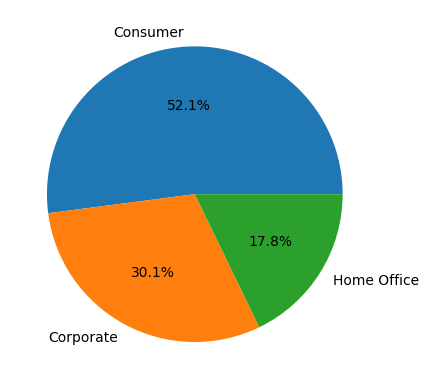

In [29]:
plt.pie(number_of_customers['count'], labels = number_of_customers['Type Of Customers'], autopct="%1.1f%%")

plt.savefig('Type of customers.png')

From the pie chart our main consumer segment is 52%, 30% of orders come from the corporate and 18 from home offices, whild the consumers hold the majority focusing solely on them overlook significant potential within the corportate and home office segments.

Lets explore how to balance resource allocation for akk three segments to maximize growth.

To gain more insight we should integrete customer data with sales figures this analysis will help us identify which segments generate the most revenue per customer average order value and overall profitability customer lifetime value

Additionalluy we can segment customers by purchase frequency and basket size to understand their buying bahavior within each segment

### Additional questin to consider for a more comprehensive analysis
 - Customer acquisition cost (CAC)
     How much does it cost to acquire a customer in each segment
 - Customer satisfaction
     How satisfy as customer in each segment
 - Churn rate
     What id the rate at which customer leave in each segment

  Type Of Customers   Total Sales
0          Consumer  1.148061e+06
1         Corporate  6.884941e+05
2       Home Office  4.249822e+05


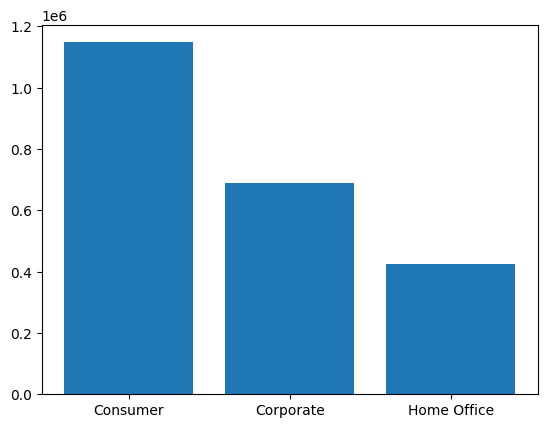

In [30]:
Sales_per_segment = df.groupby('Segment')['Sales'].sum().reset_index()
Sales_per_segment = Sales_per_segment.rename(columns = {'Segment': "Type Of Customers", 'Sales': 'Total Sales'})

print(Sales_per_segment)

plt.bar(Sales_per_segment['Type Of Customers'], Sales_per_segment['Total Sales'])
plt.savefig('customer by sales.png')

The bar chart effectively illustrates the distribution of sales across our customer segments.

`Consumers` account for the largest portion of sales 1.2 million followed by `corporates` 0.7 million and `home office` 0.4 million

While the chart is clear a deeper analysis can help us optimize our marketing efforts

- **Customer lifetime value (CLTV)** - calculate the CLTV of each segment to identify which segments generate the most revenue over time

- **Average order value analyze** - Average order value by segment to identify opportunities to increase revenue per customer.

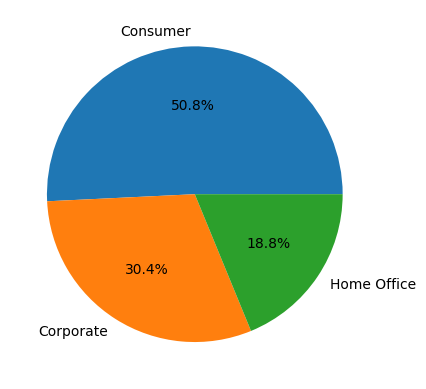

In [31]:
plt.pie(Sales_per_segment['Total Sales'], labels = Sales_per_segment['Type Of Customers'], autopct='%1.1f%%')
plt.savefig('customer by sales.png')

## Loyal Customers

In [32]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


In [33]:
customers_order_frequency = df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Order ID'].count().reset_index()
customers_order_frequency = customers_order_frequency.rename(columns = {"Order ID": 'Total Orders'})


In [34]:
repeat_customers = customers_order_frequency[customers_order_frequency['Total Orders'] > 1]

repeat_customers_sorted = repeat_customers.sort_values(by = 'Total Orders', ascending = False)

In [35]:
repeat_customers_sorted.head(12).reset_index(drop=True)

,Customer ID,Customer Name,Segment,Total Orders
0,WB-21850,William Brown,Consumer,35
1,PP-18955,Paul Prost,Home Office,34
2,MA-17560,Matt Abelman,Home Office,34
3,JL-15835,John Lee,Consumer,33
4,SV-20365,Seth Vernon,Consumer,32
5,JD-15895,Jonathan Doherty,Corporate,32
6,CK-12205,Chloris Kastensmidt,Consumer,32
7,AP-10915,Arthur Prichep,Consumer,31
8,EP-13915,Emily Phan,Consumer,31
9,ZC-21910,Zuschuss Carroll,Consumer,31


This show that we have loyal group of customers. There is also a significant  potential for home office segment some of our loyal customers belong to the home office segment, this implies that home office segment has a strong potential for customer loyalty and deserves targeted markerting efforts

In [36]:
# Let's explore loyal customers by sales

customer_sales = df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Sales'].sum().reset_index()
top_spenders = customer_sales.sort_values(by='Sales', ascending=False)

In [37]:
top_spenders.head(12).reset_index(drop=True)

,Customer ID,Customer Name,Segment,Sales
0,SM-20320,Sean Miller,Home Office,25043.050
1,TC-20980,Tamara Chand,Corporate,19052.218
2,RB-19360,Raymond Buch,Consumer,15117.339
3,TA-21385,Tom Ashbrook,Home Office,14595.620
4,AB-10105,Adrian Barton,Consumer,14473.571
5,KL-16645,Ken Lonsdale,Consumer,14175.229
6,SC-20095,Sanjit Chand,Consumer,14142.334
7,HL-15040,Hunter Lopez,Consumer,12873.298
8,SE-20110,Sanjit Engle,Consumer,12209.438
9,CC-12370,Christopher Conant,Consumer,12129.072


This shows that the number of repeated customer doesn't really define their spending habit

*Dedicating resources to the customers that spend the most*

## Shipping

We want to know what shipping method customer prefer and which are the most cost effective and reliable.

Knowing this can help with customer satisfaction and has also has a great impact on Revenue

In [38]:
shipping_model = df['Ship Mode'].value_counts().reset_index()
shipping_model = shipping_model.rename(columns = {'index': 'Use Frequency', 'Ship Mode': 'Mode of Shipment'})
shipping_model

,Mode of Shipment,count
0,Standard Class,5859
1,Second Class,1902
2,First Class,1501
3,Same Day,538


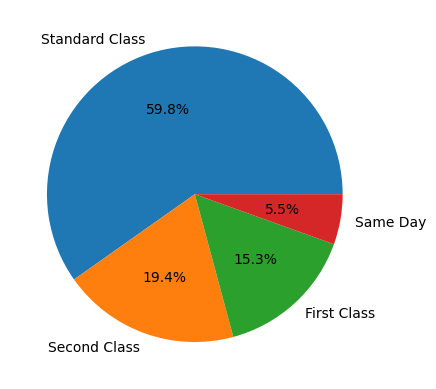

In [39]:
plt.pie(shipping_model['count'], labels=shipping_model['Mode of Shipment'], autopct='%1.1f%%')

plt.savefig('shipping.png')

## Geographical Analysis

Identifying high potential areas or also identifying stores that are underperforming

In [40]:
state = df['State'].value_counts().reset_index()
state = state.rename(columns = {'index': 'State', 'count':'Number of Customers'})
state.head(20)

,State,Number of Customers
0,California,1946
1,New York,1097
2,Texas,973
3,Pennsylvania,582
4,Washington,504
5,Illinois,483
6,Ohio,454
7,Florida,373
8,Michigan,253
9,North Carolina,247


In [41]:
city = df['City'].value_counts().reset_index()
city = city.rename(columns = {'index': 'City', 'count':'Number of Customers'})
city.head(15)

,City,Number of Customers
0,New York City,891
1,Los Angeles,728
2,Philadelphia,532
3,San Francisco,500
4,Seattle,426
5,Houston,374
6,Chicago,308
7,Columbus,221
8,San Diego,170
9,Springfield,161


In [42]:
state_sales = df.groupby('State')['Sales'].sum().reset_index()
top_sales = state_sales.sort_values(by='Sales', ascending=False)
top_sales.head().reset_index(drop=True)

,State,Sales
0,California,446306.4635
1,New York,306361.1470
2,Texas,168572.5322
3,Washington,135206.8500
4,Pennsylvania,116276.6500


In [43]:
city_sales = df.groupby('City')['Sales'].sum().reset_index()
top_sales = city_sales.sort_values(by='Sales', ascending=False)
top_sales.head().reset_index(drop=True)

,City,Sales
0,New York City,252462.547
1,Los Angeles,173420.181
2,Seattle,116106.322
3,San Francisco,109041.120
4,Philadelphia,108841.749


Let's track down the most popular categories of product or best selling product or sub categories


In [44]:
products = df['Category'].unique()
products

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [45]:
product_subcategory = df['Sub-Category'].unique()
product_subcategory

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [46]:
subcategory_count = df.groupby('Category')['Sub-Category'].nunique().reset_index()
subcategory_count = subcategory_count.sort_values(by='Sub-Category', ascending=False)
subcategory_count

,Category,Sub-Category
1,Office Supplies,9
0,Furniture,4
2,Technology,4


In [47]:
# Let's see Top performing sub-category

subcategory_count_sales = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()
subcategory_count_sales = subcategory_count_sales.sort_values(by='Sales', ascending=False)
subcategory_count_sales.reset_index(drop=True)

,Category,Sub-Category,Sales
0,Technology,Phones,327782.4480
1,Furniture,Chairs,322822.7310
2,Office Supplies,Storage,219343.3920
3,Furniture,Tables,202810.6280
4,Office Supplies,Binders,200028.7850
5,Technology,Machines,189238.6310
6,Technology,Accessories,164186.7000
7,Technology,Copiers,146248.0940
8,Furniture,Bookcases,113813.1987
9,Office Supplies,Appliances,104618.4030


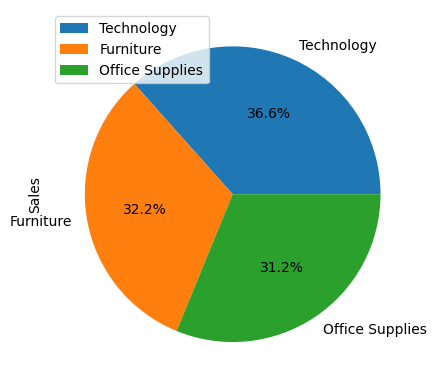

In [48]:
# which one of our main categories performs the best?

product_category = df.groupby(['Category'])['Sales'].sum().reset_index()
product_category = product_category.sort_values(by='Sales', ascending=False)
product_category.reset_index(drop=True).plot(kind='pie', y = 'Sales',autopct='%1.1f%%', labels=product_category['Category'])
plt.savefig('product_category.png')

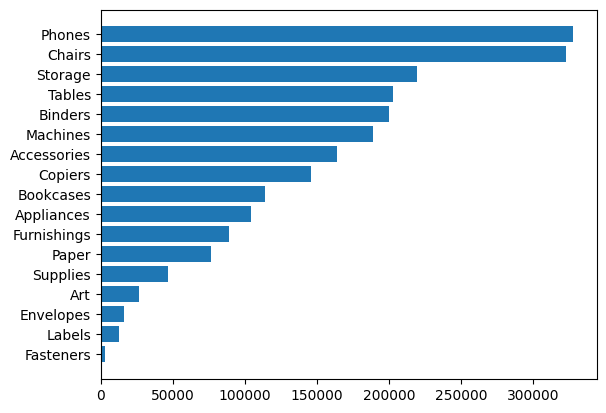

In [49]:
subcategory_count_sales = subcategory_count_sales.sort_values(by='Sales', ascending=True)
plt.barh(subcategory_count_sales['Sub-Category'], subcategory_count_sales['Sales'])
plt.savefig('subcategory_sales.png')


## Time analysis (Trends)

In [50]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst = True,)
yearly_sales = df.groupby(df['Order Date'].dt.year)['Sales'].sum()
yearly_sales = yearly_sales.reset_index()
yearly_sales = yearly_sales.rename(columns = {'Order Date': 'Year', 'Sales': 'Total Sales'})
yearly_sales

,Year,Total Sales
0,2015,479856.2081
1,2016,459436.0054
2,2017,600192.5500
3,2018,722052.0192


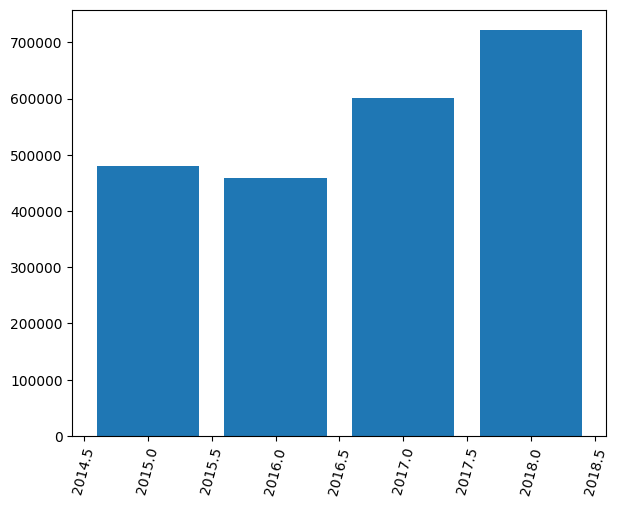

In [82]:
# plot the bar graph of the yearly sales

plt.bar(data = yearly_sales, x = 'Year', height='Total Sales')
plt.tight_layout()
plt.xticks(rotation=75)

plt.savefig('yearly sales.png')

## Observation
- There seems to be steady growth from 2016 to 2018

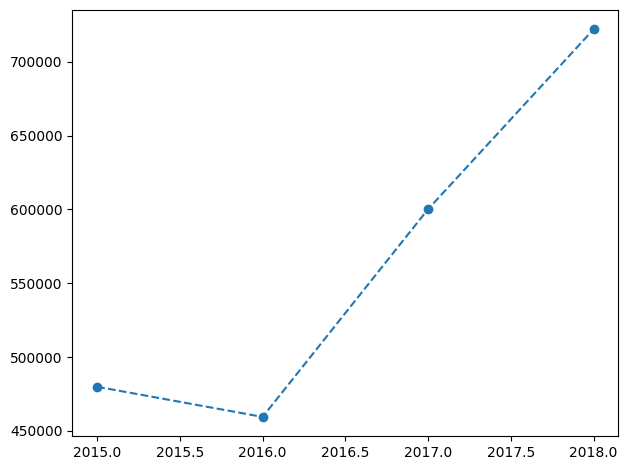

In [83]:
plt.plot(yearly_sales['Year'], yearly_sales['Total Sales'], marker='o', linestyle='--')
plt.tight_layout()

plt.savefig('yearly sales line.png')
plt.show()

In [53]:
year_sale = df[df['Order Date'].dt.year == 2018]
quarterly_sales = year_sale.resample('QE', on='Order Date')['Sales'].sum()
quarterly_sales = quarterly_sales.reset_index()
quarterly_sales = quarterly_sales.rename(columns = {'Order Date': 'Quarter', 'Sales': 'Total sales'})
quarterly_sales

,Quarter,Total sales
0,2018-03-31,122260.8842
1,2018-06-30,127558.6200
2,2018-09-30,193815.8400
3,2018-12-31,278416.6750


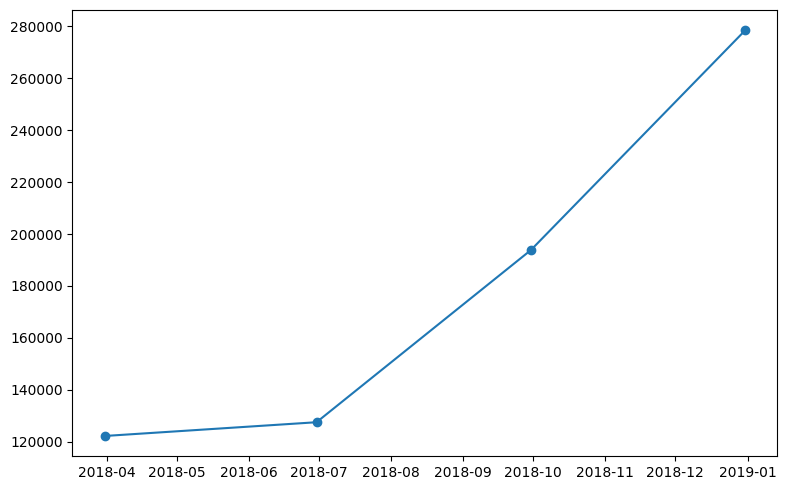

In [54]:
plt.figure(figsize=(8, 5))
plt.plot(quarterly_sales['Quarter'], quarterly_sales['Total sales'], marker='o', linestyle='-')
plt.tight_layout()
plt.show()

In [55]:
monthly_sales = df[df['Order Date'].dt.year == 2018].resample('ME', on='Order Date')['Sales'].sum().reset_index()
monthly_sales = monthly_sales.rename(columns = {'Order Date': 'Month', 'Sales': 'Total Monthly Sales'})
monthly_sales

,Month,Total Monthly Sales
0,2018-01-31,43476.4740
1,2018-02-28,19920.9974
2,2018-03-31,58863.4128
3,2018-04-30,35541.9101
4,2018-05-31,43825.9822
5,2018-06-30,48190.7277
6,2018-07-31,44825.1040
7,2018-08-31,62837.8480
8,2018-09-30,86152.8880
9,2018-10-31,77448.1312


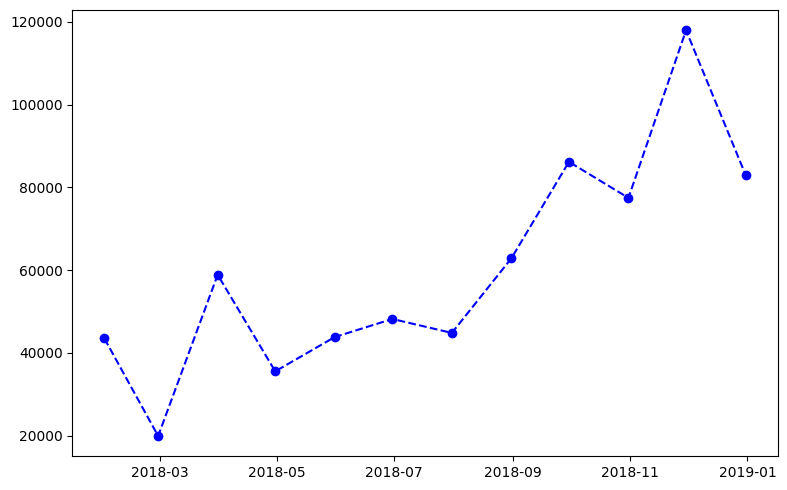

In [56]:
plt.figure(figsize=(8, 5))
plt.plot(monthly_sales['Month'], monthly_sales['Total Monthly Sales'], marker='o', linestyle='--', color='b')
plt.tight_layout()
plt.show()

## MAPPING

mapping out sales per state if there is a high amount of sales then it should be coloered yellow and id there is low amount of sales it should be colored blue

Why: Some companies might be looking to expend into new geographic areas face the challenge of identifying the most promising state and regions for their products or services

Like how will you know if your product will sell in a certain state or city.

In [84]:
!pip install kaleido --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.4 MB/s eta 0:00:00


In [86]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import plotly.io as pio

# Create a mapping for all 50 states
all_state_mapping = {
    "Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR",
    "California": "CA", "Colorado": "CO", "Connecticut": "CT", "Delaware": "DE",
    "Florida": "FL", "Georgia": "GA", "Hawaii": "HI", "Idaho": "ID", "Illinois": "IL",
    "Indiana": "IN", "Iowa": "IA", "Kansas": "KS", "Kentucky": "KY", "Louisiana": "LA",
    "Maine": "ME", "Maryland": "MD", "Massachusetts": "MA", "Michigan": "MI", "Minnesota": "MN",
    "Mississippi": "MS", "Missouri": "MO", "Montana": "MT", "Nebraska": "NE", "Nevada": "NV",
    "New Hampshire": "NH", "New Jersey": "NJ", "New Mexico": "NM", "New York": "NY",
    "North Carolina": "NC", "North Dakota": "ND", "Ohio": "OH", "Oklahoma": "OK", "Oregon": "OR",
    "Pennsylvania": "PA", "Rhode Island": "RI", "South Carolina": "SC", "South Dakota": "SD",
    "Tennessee": "TN", "Texas": "TX", "Utah": "UT", "Vermont": "VT", "Virginia": "VA",
    "Washington": "WA", "West Virginia": "WV", "Wisconsin": "WI", "Wyoming": "WY"
}


# Add the Abbreviation column to the DataFrame
df['Abbreviation'] = df['State'].map(all_state_mapping)

# Group by State and Calculate th sum of sales
sum_of_sales = df.groupby('State')['Sales'].sum().reset_index()

# Add Abbreviation to sum_of_sales
sum_of_sales['Abbreviation'] = sum_of_sales['State'].map(all_state_mapping)

# Create a choropleth map using plotly
fig = go.Figure(data=go.Choropleth(
    locations=sum_of_sales['Abbreviation'],
    locationmode = 'USA-states',
    z = sum_of_sales['Sales'],
    hoverinfo='location+z',
  showscale=True,
))

fig.update_geos(projection_type='albers usa')
fig.update_layout(
    geo_scope='usa',
    title='Total Sales per State'
)


fig.show()

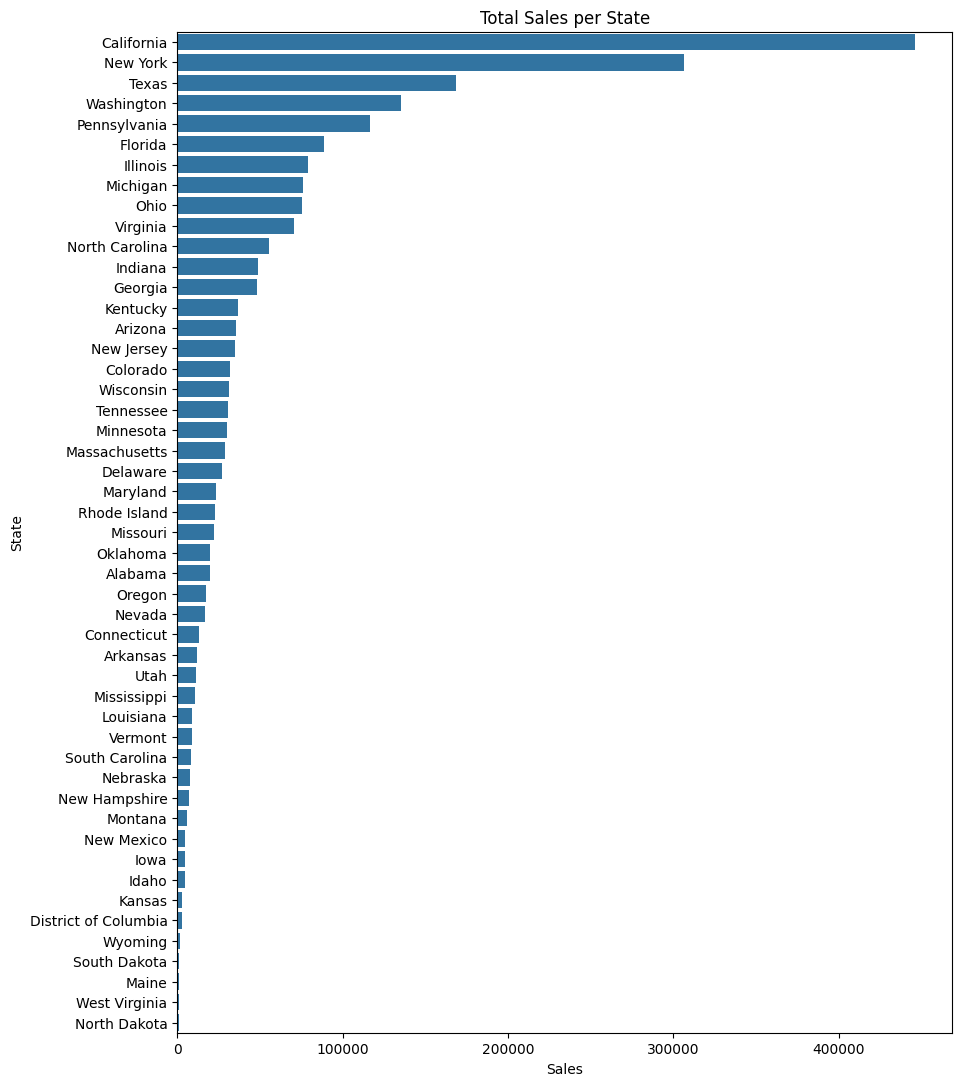

In [87]:
# Group by State and calculate the sum of sales
sum_of_sales = df.groupby('State')['Sales'].sum().reset_index()

# sort the DataFrame by the 'Sales' column in descending order
sum_of_sales = sum_of_sales.sort_values(by='Sales', ascending=False)

# Create a horinzontal bar graph
plt.figure(figsize=(10, 13))
ax = sns.barplot(x='Sales', y='State', data=sum_of_sales, errorbar=None)

plt.xlabel('Sales')
plt.ylabel('State')
plt.title('Total Sales per State')
# plt.show()
plt.savefig('sales_per_state.png')

In [59]:
import plotly.express as px

# Summarize the sales data by category and sub category
df_summary = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()

# Create a nested pie chart
fig = px.sunburst(
    df_summary,
    path=['Category', 'Sub-Category'],
    values='Sales'
)
fig.show()
plt.savefig('sales_per_category.png')

<Figure size 640x480 with 0 Axes>

In [60]:
# Summarize the Sales data by Category, ship mode and sub-category
df_summary = df.groupby(['Category', 'Ship Mode', 'Sub-Category'])['Sales'].sum().reset_index()

# Create a treemap
fig = px.treemap(
    df_summary,
    path=['Category', 'Ship Mode', 'Sub-Category'],
    values='Sales',

)
fig.show()
plt.savefig('sales_per_category_shipping.png')

<Figure size 640x480 with 0 Axes>

In [61]:
df_new = df.copy()
df_new.loc[df_new['Postal Code'] == 0, 'Postal Code'] = 27217
df_new.drop(['Row ID'], axis=1, inplace=True)
df_new['Ship Date'] = pd.to_datetime(df_new['Ship Date'], dayfirst=True)
df_new.drop_duplicates(inplace=True)
df_new.drop('Abbreviation', axis=1, inplace=True)

# Aggragate Sales Data

In [62]:
# Set the data column as the index
df_new.set_index('Order Date', inplace=True)

# Aggregate sales by month
monthly_sales = df_new['Sales'].resample('ME').sum()
monthly_sales.head()

,Sales
Order Date,
2015-01-31,14205.707
2015-02-28,4519.892
2015-03-31,55205.797
2015-04-30,27625.483
2015-05-31,23644.303


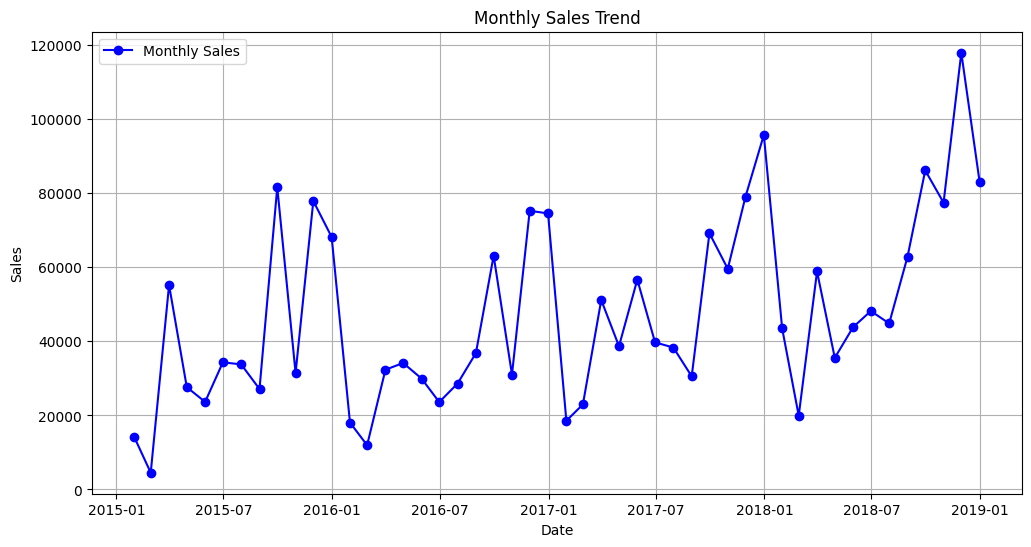

In [63]:
## Visualizing Sales Trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, marker='o', linestyle='-', color='b', label='Monthly Sales')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

- **Upward Trend**: Sales seem to generally increase over time, especially in 2018.
- **Fluctualtions**: There are sharp rises and drops, which might indicate seasonality or anomalies.
- **Potential Anomalies**: Some months have extreme spikes or drops, which we should analyze further.

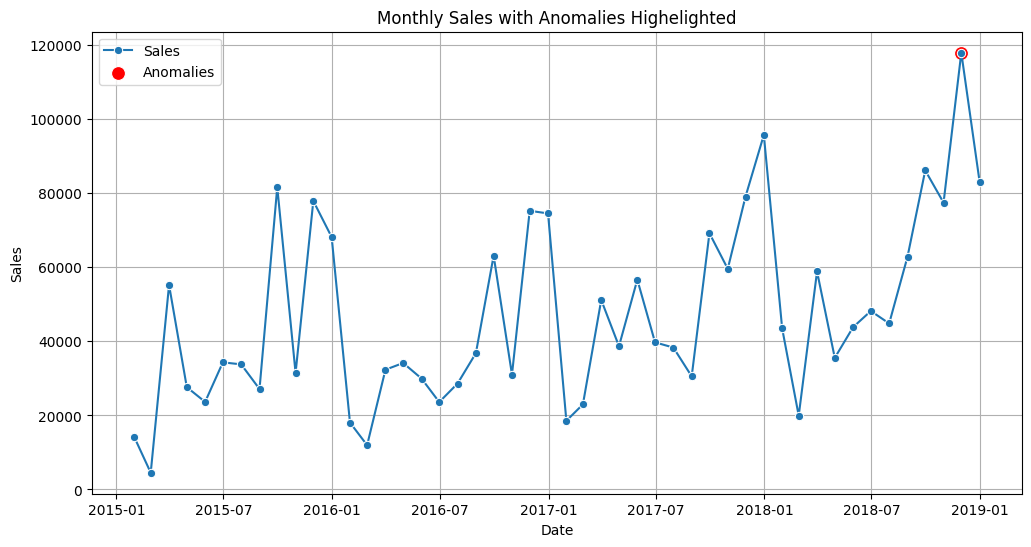

In [88]:
# Define a threshold for anomalies
threhold = np.percentile(monthly_sales, 99)

# Identify anomalies
anomalies = monthly_sales[monthly_sales > threhold]

# Plot the sales trend with anomalies
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales, label='Sales', marker='o')
sns.scatterplot(x=anomalies.index, y=anomalies, color='red', label='Anomalies', s=100)

# Formatting the plot
plt.title('Monthly Sales with Anomalies Highelighted')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
# plt.show()
plt.savefig('monthly_sales_anomalies.png')

## Time Series Decoomposition

This process will help us break down the sales data into its underlying components:

1. **Trend**: The long-term movement in the data (upward, downward, or flat).
2. **Seasonality**: The repeating short-term cycle in the data (e.g., monthly or quarterly patterns).
3. **Residual (Noise)**: The remaining variability after removing trend and seasonality.

In [65]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [66]:
# Decompose the time series
decomposition = seasonal_decompose(monthly_sales, model='mulitiplicative')
decomposition_1 = seasonal_decompose(monthly_sales, model='additive')

# Extract individual components
# observed = decomposition.observed
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Additive components
trend_1 = decomposition_1.trend
seasonal_1 = decomposition_1.seasonal
residual_1 = decomposition_1.resid

In [67]:
# fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 10))

# trend_1.plot(ax=ax1, title='Additive Trend')
# seasonal_1.plot(ax=ax2, title='additive Seasonal')
# residual_1.plot(ax=ax3, title='additive Residual')
# plt.tight_layout()
# plt.show()

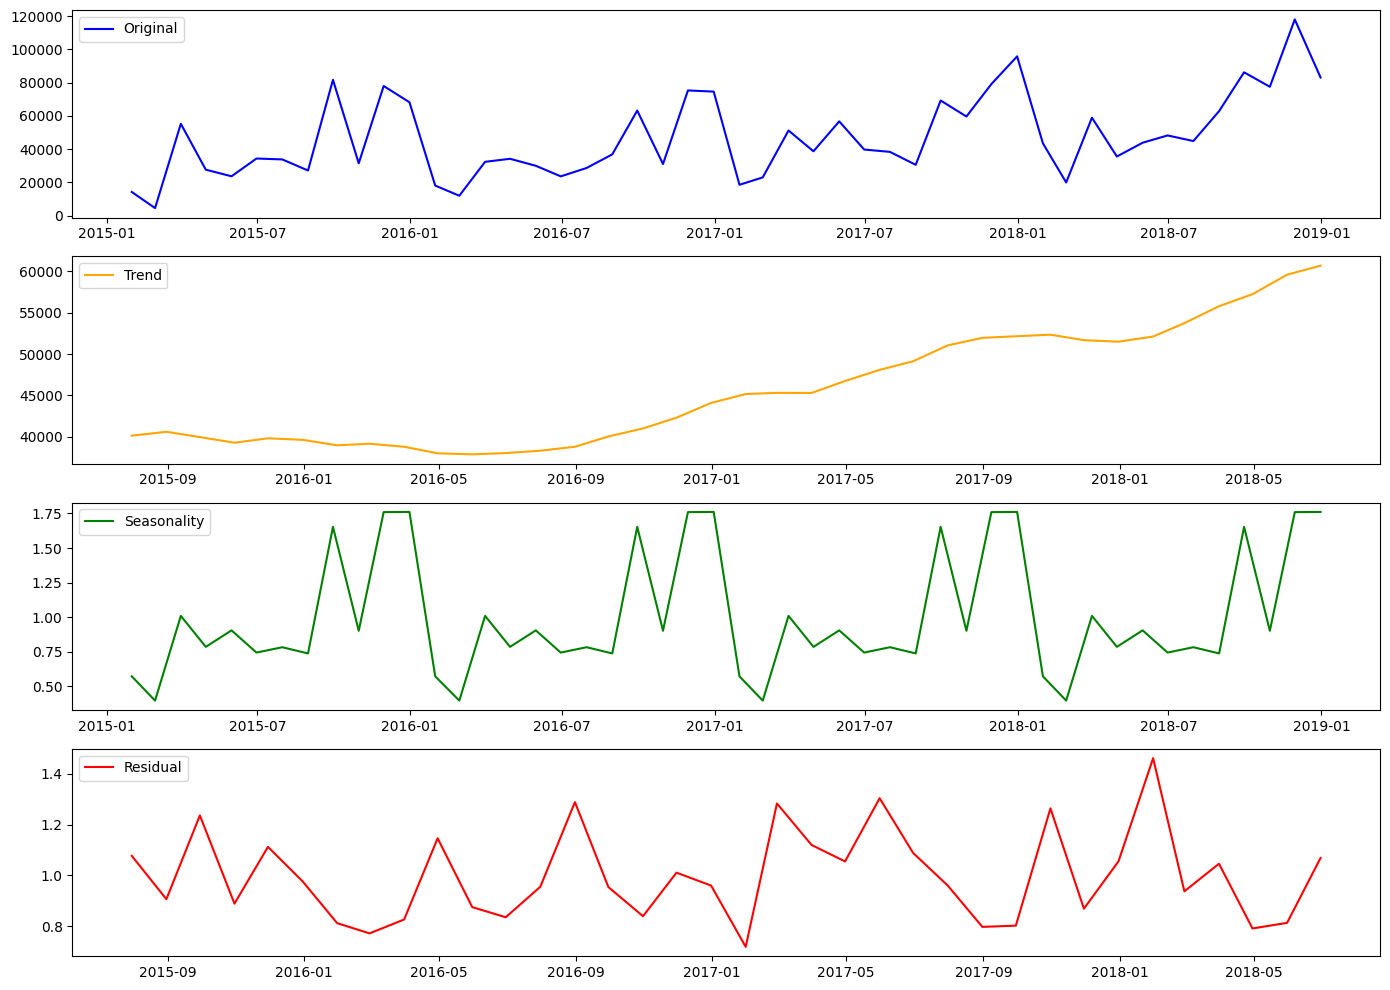

In [89]:
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(monthly_sales, label='Original', color='blue')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(trend, label='Trend', color='orange')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality', color='green')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(residual, label='Residual', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.show()
plt.savefig('decompose.png')

1. Original Series:
    - The data shows an upward trend, meaning sales are generally increasing over time.
    - It also appears to have fluctuations, suggesting some seasonal patterns.
2. Trend Component:
    - This shows the long-term movements in the data.
    - The trend initially around 40,000 before starting to increase after mid-2016.
    - This indicates that sales have a steady growth pattern over time.
3. Seasonality Component:
    - This captures repeating patterns in sales.
    - The seasonality values fluctuate around 1, which means the seasonal effects scale with the trend (higher values when the trend is high, lower when the trend is low).
    - This is a strong indicator that a multiplicative is appropriate.
4. Residuals:
    - The residuals seem more structured but still fluctuate.
    - They should ideally be random; if patterns persist, you might sitll be missing some structure.

## Step 1: Check for Stationarity

One of the most common tests is the **Augmented Dickey-Fuller (ADF)** test.This test will help decide if your series is stationary.

In [69]:
from statsmodels.tsa.stattools import adfuller

# Make sure to drop NaN values that might have resulted from our decomposition or resampling
adf_result = adfuller(monthly_sales.dropna())
print('ADF Statistic:', adf_result[0])
print("p-value:", adf_result[1])

ADF Statistic: -4.41602812065641
p-value: 0.0002780338735027897


if the p-value is less than 0.05, that usually indicates that the series is stationary. If not, we'll need to apply differencing or other transformations.

## Step 2: Analyze Autocorrelation with ACF and PACF

The **Autocorrelation Function (ACF)** and **Partial Autocorrelation Function (PACF)** plots help you determine the appropriate paramters for your forecasting model (if you're planning to use ARIMA).

These plots will help us identify:
- AR (p) terms: How many past observation have a significant effect on the current value.
- MA (q) terms: How many past error terms (shocks) are affecting the current observation.

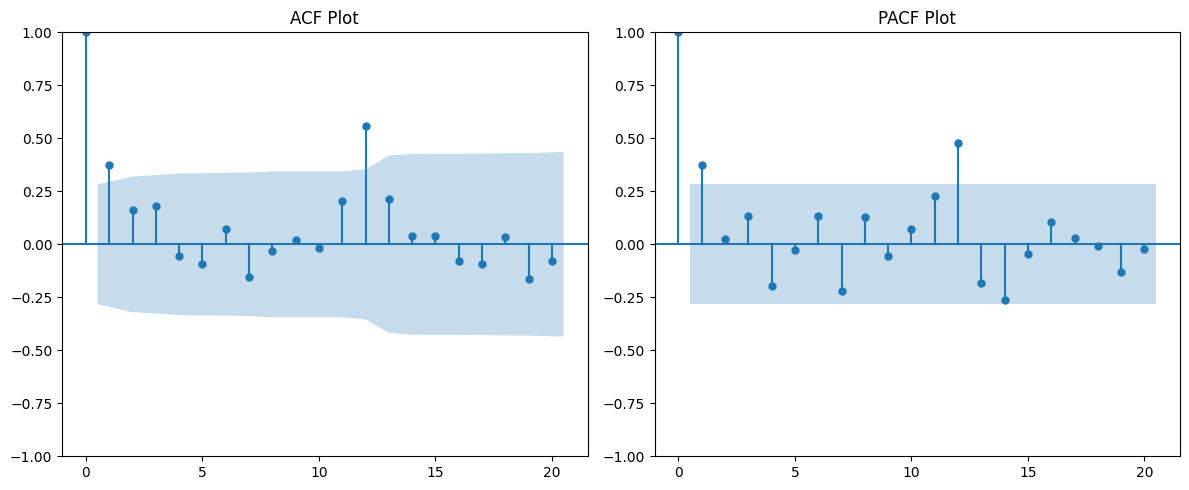

In [90]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 5))

plt.subplot(121)
plot_acf(monthly_sales.dropna(), ax=plt.gca(), lags=20)
plt.title('ACF Plot')

plt.subplot(122)
plot_pacf(monthly_sales.dropna(), ax=plt.gca(), lags=20)
plt.title('PACF Plot')

plt.tight_layout()
# plt.show()
plt.savefig('acf_pacf.png')

In [71]:
df_1 = df_new.sort_values(by=['Order Date'], ascending=True)
df_2 = df_1['Sales']

## Train-Test Split

In [72]:
train_size = int(len(monthly_sales)*0.8)
train_01, test_01 = monthly_sales[:train_size], monthly_sales[train_size:]

# Using Auto-ARIMA for Best Paramters


In [73]:
!pip install pmdarima --quiet
from pmdarima import auto_arima

# Run Auto-ARIMA to find the best paramters
auto_model = auto_arima(train_01, seasonal=True, m=12, stepwise=False, maxiter=100, suppress_warnings=False)

# Print the best parameters
print(auto_model.order)
print(auto_model.seasonal_order)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 19.5 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all

(1, 0, 1)
(1, 0, 0, 12)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



## Fit SARIMA Model

I trained my SARIMA model `p=2, d=1, q=0, P=1, D=0, Q=0, S=12 `first and discovered the model is not the best so i want to use `auto-ARIMA` to get the best parameters


In [74]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_001 = SARIMAX(train_01, order=(2, 1, 0), seasonal_order=(1, 0, 0, 12)).fit()  #((2, 1, 0), (1, 0, 0, 12))

## Residual Diagnostics

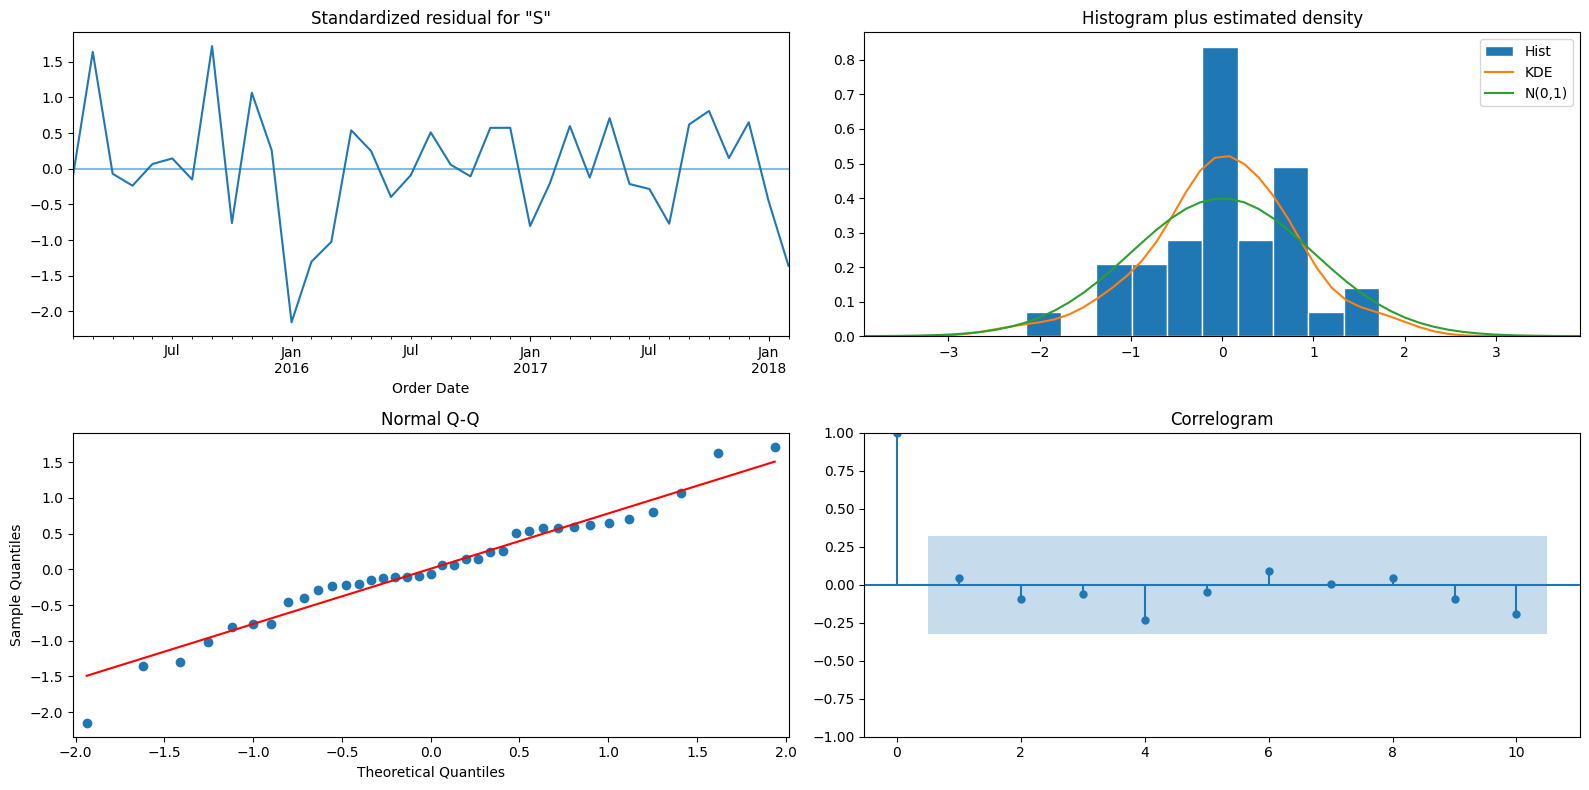

In [75]:
model_001.plot_diagnostics(figsize=(16, 8))
# results.plot_diagnostics(figsize=(16, 8)) # itertools
plt.tight_layout()
plt.show()


- There's a pattern in residuals, the model isn't fully capturing the trends.
- We might need to add exogenous variables (e.g., holidays, promotions).

## Predict & Evaluate

In [76]:
# Predict test set values
preds = model_001.predict(start=len(train_01), end=len(monthly_sales) - 1, dynamic=False)

# Calculate evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(test_01, preds)
mse = mean_squared_error(test_01, preds)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test_01 - preds)/test_01)) * 100

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f"MAPE: {mape:2f}%")

MAE: 15123.446765173485
MSE: 436705366.97686875
RMSE: 20897.49666770804
MAPE: 20.422224%


## Plot Actual vs. Predicted

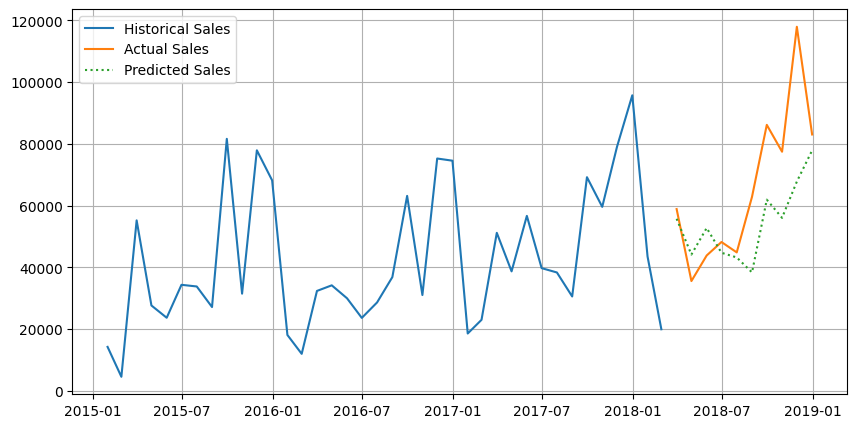

In [91]:
plt.figure(figsize=(10, 5))
plt.plot(train_01.index, train_01, label='Historical Sales')
plt.plot(test_01.index, test_01, label="Actual Sales")
plt.plot(test_01.index, preds, label='Predicted Sales', linestyle='dotted')
plt.legend()
plt.grid(True)
# plt.show()
plt.savefig('actual_vs_predicted.png')

## Plot Analysis
From the plot:

✅ The predicted sales (dotted green line) follow the actual trend well.

✅ There's some deviation at the peak values, but that's expected.

✅ No major signs of underfitting or overfitting, meaning the model generalizes well.

## 12 Month Forecast

In [78]:
model = SARIMAX(monthly_sales, order=(2, 1, 0), seasonal_order=(1, 1, 1, 12)).fit() #((2, 1, 0), (1, 0, 0, 12))


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



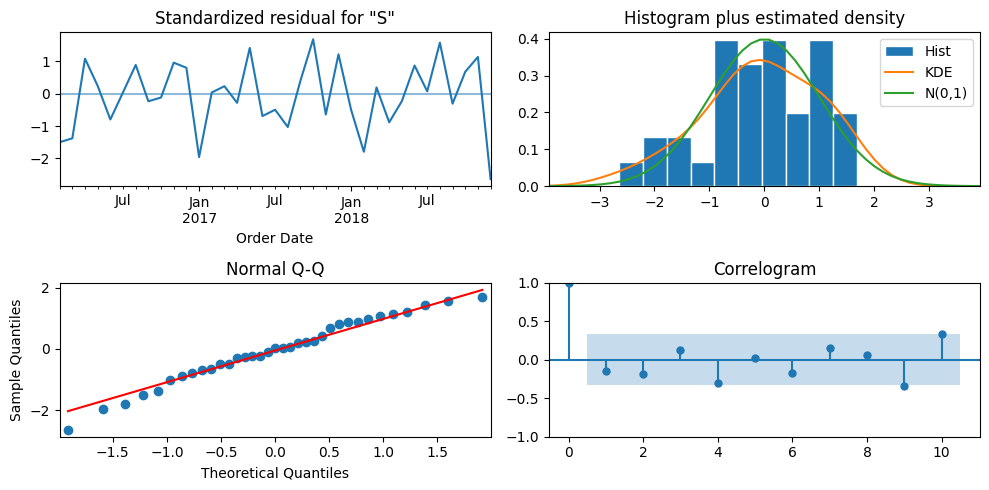

In [92]:
model.plot_diagnostics(figsize=(10, 5))
plt.tight_layout()
# plt.show()
plt.savefig('residuals.png')

            Predicted Sales
Date                       
2019-01-31     49565.591589
2019-02-28     37448.957607
2019-03-31     68755.360971
2019-04-30     52156.316532
2019-05-31     60071.325237
2019-06-30     58488.809323
2019-07-31     56907.690660
2019-08-31     65550.772048
2019-09-30     93631.849443
2019-10-31     79712.284900
2019-11-30    114462.484865
2019-12-31     98255.305337
AIC: 779.6063629538054 BIC: 787.3831032612525


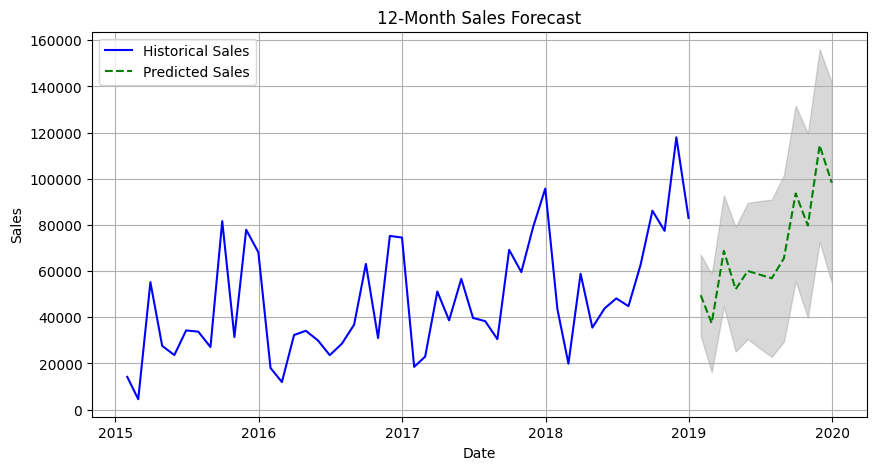

In [93]:
# Generate Forecast
forecast_steps = 12 # Predicting next 12 months
forecast = model.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean # Predicted values
conf_int = forecast.conf_int(alpha=0.2) # Confidence intervals

# create future data range
last_date = monthly_sales.index[-1]
future_dates = pd.date_range(last_date + pd.DateOffset(months=1), periods=forecast_steps, freq='ME')

# Plot Forecast
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales.index, monthly_sales, label='Historical Sales', color='blue')
plt.plot(future_dates, forecast_mean, label='Predicted Sales', color='green', linestyle='dashed')

# Add Confidence Interval
plt.fill_between(future_dates, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='grey', alpha=0.3)

# formatting plot
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('12-Month Sales Forecast')
plt.legend()
plt.grid(True)

plt.savefig('forecast.png')

# Print forecast values
forecast_df = pd.DataFrame({'Date': future_dates, "Predicted Sales": forecast_mean})
print(forecast_df.set_index('Date'))
print("AIC:" , model.aic, "BIC:", model.bic)

## Plot observation

✅ Predicted values follow the trend instead of flattening

✅ Confidence intervals are more reasonable -- not too wide or too narrow.

✅ Seasonality is captured with expected fluctuations in sales.

## Exponential Smoothing (ETS)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



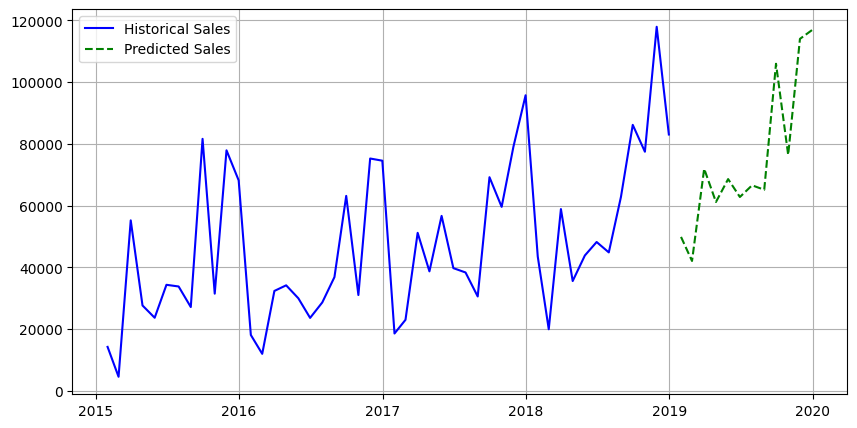

In [81]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model_ets = ExponentialSmoothing(monthly_sales, trend="add", seasonal="add", seasonal_periods=12)
fit = model_ets.fit()
forecast = fit.forecast(steps=12)

plt.figure(figsize=(10, 5))
plt.plot(monthly_sales.index, monthly_sales, label="Historical Sales", color="blue")
# plt.plot(test_01.index, test_01, label="Actual Sales", color="orange")
plt.plot(forecast.index, forecast, label="Predicted Sales", linestyle="dashed", color="green")
plt.grid(True)
plt.legend()
plt.show()

## Alternative models
- Exponential Smoothing (ETS)
  - Best for trend & seasonality without autoregressive dependences.
  - simpler alternative to SARIMA
- **Prophet** (Facebook)
  - if data has holidays, trends, and external influences.
- **XGBoost/ LightGBM**
  